> **Note:** In most sessions you will be solving exercises posed in a Jupyter notebook that looks like this one. Because you are cloning a Github repository that only we can push to, you should **NEVER EDIT** any of the files you pull from Github. Instead, what you should do, is either make a new notebook and write your solutions in there, or **make a copy of this notebook and save it somewhere else** on your computer, not inside the `sds` folder that you cloned, so you can write your answers in there. If you edit the notebook you pulled from Github, those edits (possible your solutions to the exercises) may be overwritten and lost the next time you pull from Github. This is important, so don't hesitate to ask if it is unclear.

# Exercise Set 3: Crunching numbers (and wine)

*February 14, 2020*

In this Exercise Set 3 we will work with unsupervised machine learning, primarily dimensionality reduction and clustering, on the Wine and Digits datasets.

**Load data**

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits

# Get wine data
data_wine = load_wine()
X_wine = data_wine['data']
y_wine = data_wine['target']

# Get digits data
data_digits = load_digits()
X_digits = data_digits['data']
y_digits = data_digits['target']

<br>
<br>

## Dimensionality reduction

> **Ex. 3.1.1**: Implement PCA from scratch, and apply it to the wine dataset.
1. Visualize data along the first two principal components. Make sure to comment your
code to explain where each bit fits in the overall PCA algorithm.
2. Plot the explained variance ratio for all components. It can be computed by taking the
of a component and dividing it by the sum of all eigenvalues.
>
> *Hint: You can follow the steps outlined in the slides, or in Raschka 2017. If you follow
my example from the slides, note that there was an error at step 4, which is now fixed in an
updated version on Github.*

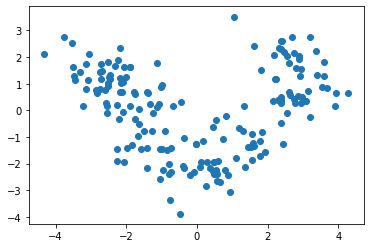

In [6]:

%matplotlib inline
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler

# Standardize
sc = StandardScaler()
X_std = sc.fit_transform(X_wine)

# Get covariance matrix
cov_mat = np.cov(X_std.T)

# Compute its eigenvalues and eigenvectors
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# Sort eigenvectors by eigenvalues in descending order
eigen_vals, eigen_vecs = zip(*sorted(
    zip(abs(eigen_vals), eigen_vecs.T),
    key=lambda kv: kv[0], reverse=True
))

# Get the top 2 eigenvectors
top_k_eigen_vecs = eigen_vecs[:2]

# Compose basis transformation matrix
W = np.hstack([
    w.reshape(-1, 1) for w in top_k_eigen_vecs
])

# Transform datapoints
Z = np.dot(X_std, W)

plt.scatter(Z[:, 0], Z[:, 1])


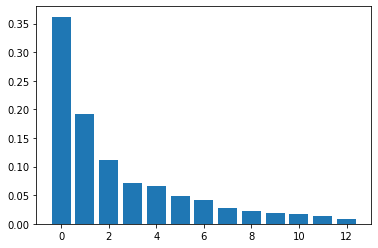

In [7]:
normed_eigenvals = np.array(eigen_vals) / sum(eigen_vals)
plt.figure()
plt.bar(range(len(eigen_vals)), normed_eigenvals)
plt.show()


> **Ex. 3.1.2**: Reproduce the figure from the slides that compares PCA, LDA, t-SNE and UMAP as applied to the digits dataset.
1. Do it for the digits dataset (same as in slides)
2. Do it also for the wine dataset. What problems do you observe if you don't standardize the wine dataset? Why is this not a problem with the digits data?
3. Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data.
>
> *Hint: You can use [this class](https://github.com/ulfaslak/ulf_pytools/blob/7f4f1eb7e2d721851c8dacb20904478b19090f2a/ulf.py#L451) for making coloring easier. It lets you create a function that takes a category as input and returns an associated color. Read the docstring for usage example.*

In [116]:
# function defs:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from umap import UMAP
def fit(X,y):
    """Fit pca, lda, tsne and umap
    returns:
        dict of title and data array
    """
    pca = PCA()
    pca_x = pca.fit(X_digits, y_digits).transform(X_digits)

    lda = LinearDiscriminantAnalysis()
    lda_x = lda.fit(X_digits, y_digits).transform(X_digits)

    tsne = TSNE()
    tsne_x = tsne.fit_transform(X_digits, y_digits)

    umap_clf = UMAP()
    umap_x = umap_clf.fit_transform(X_digits, y_digits)
    
    # collect
    methods = {'pca':pca_x, 
           'lda':lda_x,
           'tsne':tsne_x,
           'umap':umap_x}
    return methods

In [136]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

def harryPlotter(clfDict, y, maintitle="", **kwargs):
    """
    params:
        clfDict: a dict wiht title keys and values as arrays of classifier data
        y: target values
    """
    #create figure skeleton
    n_rows = np.ceil(len(clfDict)/2).astype(int)
    fig, axs = plt.subplots(n_rows,2, figsize=(15, 6*n_rows), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .2, wspace=.0001)
    axs = axs.ravel()

    # mad plots...
    for i, (title,values) in enumerate(clfDict.items()):
        createSubPlots(axs[i], values, y_digits, title)
    
    # add main title
    fig.suptitle(maintitle)

def createSubPlots(axs, X, y, title, n_targets=9, **kwargs):
    """Creates subplots needs a single axis
    """
    plt.figure()
    target_names = [i for i in range(1,n_targets+1)]
    colors = [ cm.viridis(x) for x in np.linspace(0,1,n_targets) ]
    for c, target_name in zip(colors, target_names):
        axs.scatter(X[y==target_name,0],
                    X[y==target_name,1],
                    color=c,
                    cmap='viridis',
                    lw=2,
                    label=target_name,
                    **kwargs
                   )
    axs.legend(loc='best', shadow=False, scatterpoints=1)
    axs.set_title(title)


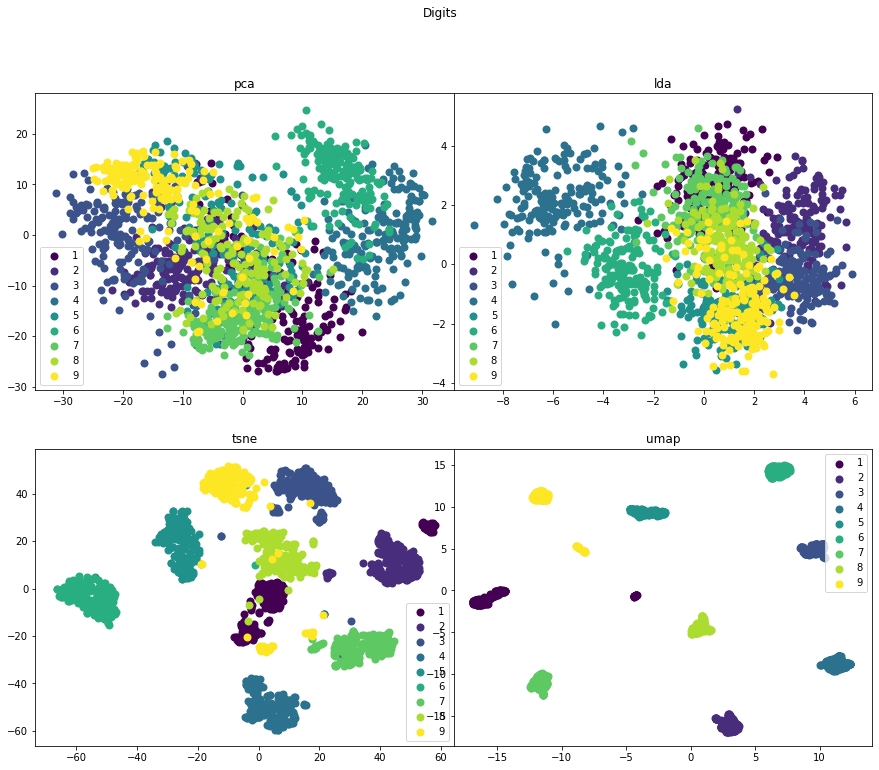

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [137]:
# fit
digits = fit(X_digits, y_digits)

# plot
harryPlotter(digits, y_digits, "Digits", alpha=.2)

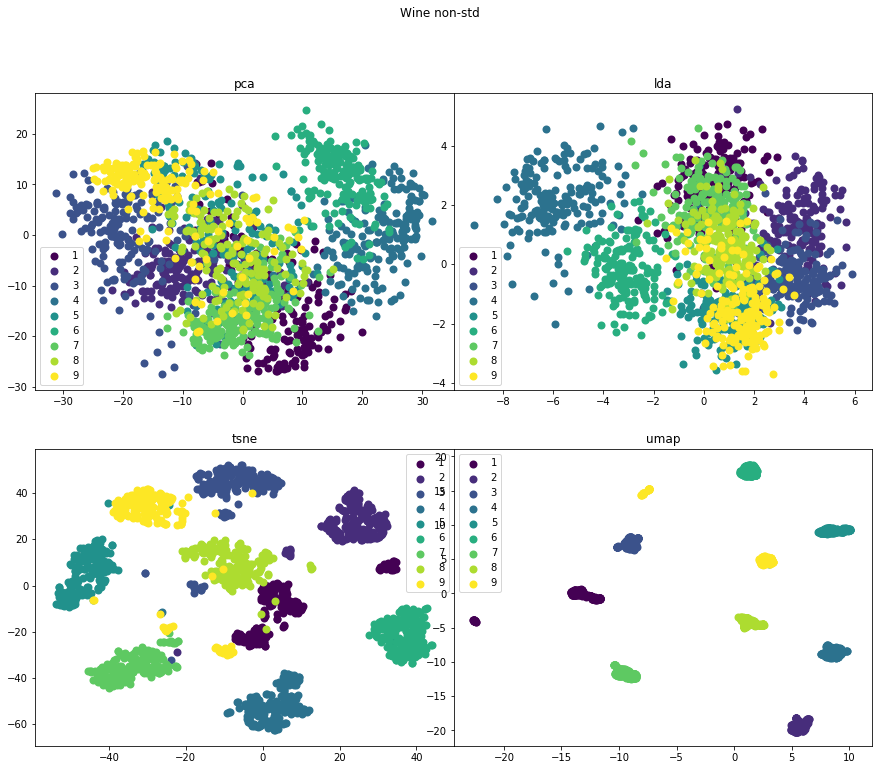

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [138]:
wine_non_std = fit(X_wine, y_wine)
harryPlotter(wine_non_std, y_wine, 'Wine non-std', alpha=.2)

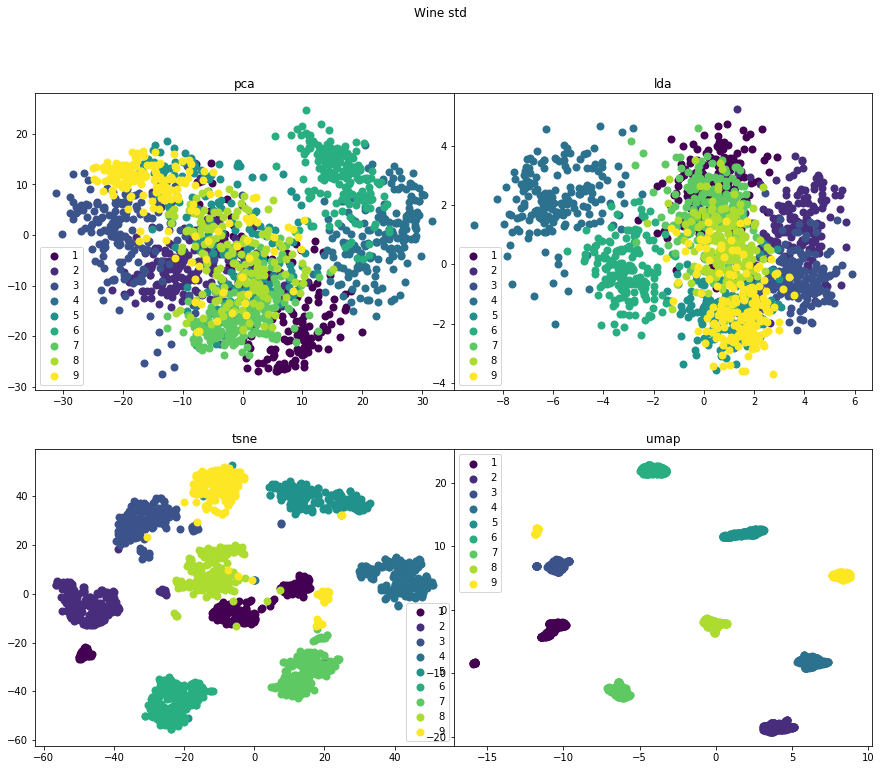

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [139]:
wine_std = fit(X_std, y_wine)
harryPlotter(wine_std, y_wine, 'Wine std', alpha=.2)